In [1]:
from ExcitonBSEKeldysh import ExcitonMoS2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
Exciton=ExcitonMoS2(epsilon=2.5,N=30,vb=[12,13],cb=[14,15],spin_orbit=True,cutoff=0.6,shift=0.5)
Exciton.constructTrionBasis()

Exciton Hamiltonian size: 320 K-space size: 80
Trion Hamiltonian size: 22416 K-space size: 80


In [67]:
Exciton.constructTrionHamiltonian()
Exciton.constuctExcitonHamiltonian()

In [84]:
Exciton.calculateAbsobtionSpectrumTrion(eta=0.002)
Exciton.calculateAbsobtionSpectrum(eta=0.002)

In [85]:
# shift=Exciton.E[Exciton.Trion_Q[0],Exciton.Trion_Q[1],7]+0.15

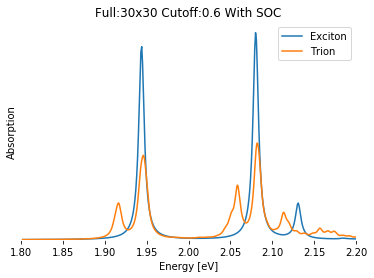

In [87]:
Exciton.plotAbsobtionSpectrum(shift=-0.715)
plt.xlim([1.8,2.2])
plt.ylim([0,None])
plt.grid()
plt.yticks([])
plt.xlabel('Energy [eV]')
plt.ylabel('Absorption')
plt.title('Full:30x30 Cutoff:0.6 With SOC')
plt.savefig('Trion_vs_Exciton.png',dpi=600)


In [96]:
kx=[];ky=[]
for indx in Exciton.trion_indexes:
    kx1,ky1,kx2,ky2,kx3,ky3,i1,i2,i3=indx
    kx.append(kx3);ky.append(ky3)
kx=np.array(kx);ky=np.array(ky)

In [97]:
K=Exciton.K[kx,ky]

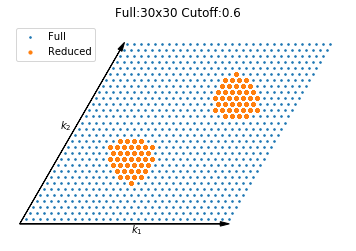

In [103]:
import matplotlib
matplotlib.rc('axes',edgecolor='white')
# plt.figure(figsize=(8,6))
plt.title('Full:30x30 Cutoff:0.6')
plt.scatter(Exciton.K[:,:,1],Exciton.K[:,:,0],marker='.',s=10,label='Full')
plt.scatter(K[:,1],K[:,0],marker='.',s=40,label='Reduced')
plt.axis('equal')
plt.legend()
plt.xticks([])
plt.yticks([])
delta=0.05
plt.arrow(0-np.sqrt(2)*delta, 0-delta, Exciton.k1[1], Exciton.k1[0], head_width=0.05, head_length=0.1, fc='k', ec='k',length_includes_head=True)
plt.arrow(0-np.sqrt(2)*delta, 0-delta, Exciton.k2[1], Exciton.k2[0], head_width=0.05, head_length=0.1, fc='k', ec='k',length_includes_head=True)
plt.text(Exciton.k2[1]/2,-0.15, s='$k_1$')
plt.text(Exciton.k1[1]/2-0.2,Exciton.k1[0]/2, s='$k_2$')
plt.savefig('Reduced_vs_Full.png',dpi=600)